In [2]:
import pandas as pd # Загрузим библиотеки, которые нам потребуются
from sklearn.preprocessing import StandardScaler 

In [3]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [4]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
df = df.drop('STDs: Time since first diagnosis', axis = 1)
df = df.drop('STDs: Time since last diagnosis', axis = 1)

In [14]:
for name in list(df):
    df[name] = pd.to_numeric(df[name])
    df = df.loc[df[name] != '?']


In [15]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

In [18]:
y = df['Dx:Cancer'] # выделяем целевую переменную
X = df.drop('Dx:Cancer', axis = 1)

In [19]:
sc = StandardScaler() # нормализация данных (датафрейм --> массив)
sc.fit(X)
X = sc.transform(X)

In [21]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
best_model = svm.SVC(kernel='linear', C=1, gamma=1) #зададим начальные параметры для модели
best_model.fit(X_train, y_train) #выполним обучение модели при начальных параметрах

SVC(C=1, gamma=1, kernel='linear')

In [23]:
from sklearn.model_selection import GridSearchCV
model_params = best_model.get_params() #зададим параметры по которым и будем осуществлять поиск
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['gamma'] = range(1, 100)
# учтем метрику ROC AUC
clf = GridSearchCV(best_model, tuned_params, cv=10, n_jobs=-1, scoring = "roc_auc")
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [24]:
from sklearn import metrics              # импортируем метрики
best_model = svm.SVC(**best_params)      # задаем найденные наилучшие параметры
best_model.fit(X_train, y_train)         # обучаем модель
predicted = best_model.predict(X_test)   # делаем предсказание
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
print('Used params:', best_params)       # выведем наилучшие параметры
print('Evaluation:\n', metrics.classification_report(y_test, predicted))
#лучшие значения метрик (те значения, которые поулчаются при наилучших параметрах модели)

Used params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Evaluation:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       1.00      0.50      0.67         4

    accuracy                           0.99       134
   macro avg       0.99      0.75      0.83       134
weighted avg       0.99      0.99      0.98       134



In [26]:
# Перебрал значения параметра "gamma" от 1 до 100, подбирая такое значение, при котором ошибка была бы минмальной. 
# Посколько мы не знаем изначально какие параметры нужно подбирать чтобы получить наилучший результат, 
#то можно проводить подобный поиск несколько раз. Давайте посмотрим сколько ошибок делает наша модель. 
#Для этого построим матрицу ошибок.
# Рассчитаем итоговую средннюю абсолютную ошибку и сравним со среднеквадратичным отклонением.

In [27]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test, predicted)
standard_deviation = y_test.var()**0.5
print(f"Ошибка при предсказании: {error}, среднеквадр. отклонение: {standard_deviation}")

Ошибка при предсказании: 0.014925373134328358, среднеквадр. отклонение: 0.17081399581080126


In [28]:
# Средняя ошибка существенно меньше чем среднеквадр. отклонение, что говорит о том, что модель в какой то степени 
# может предсказать результат по данным характеристикам человека.
# ГЛАВНОЕ: средняя ошибка весьма мала,что говорит о высокой точности модели при предсказании.
# Узнаем теперь полезные "фичи" ниже

<AxesSubplot: >

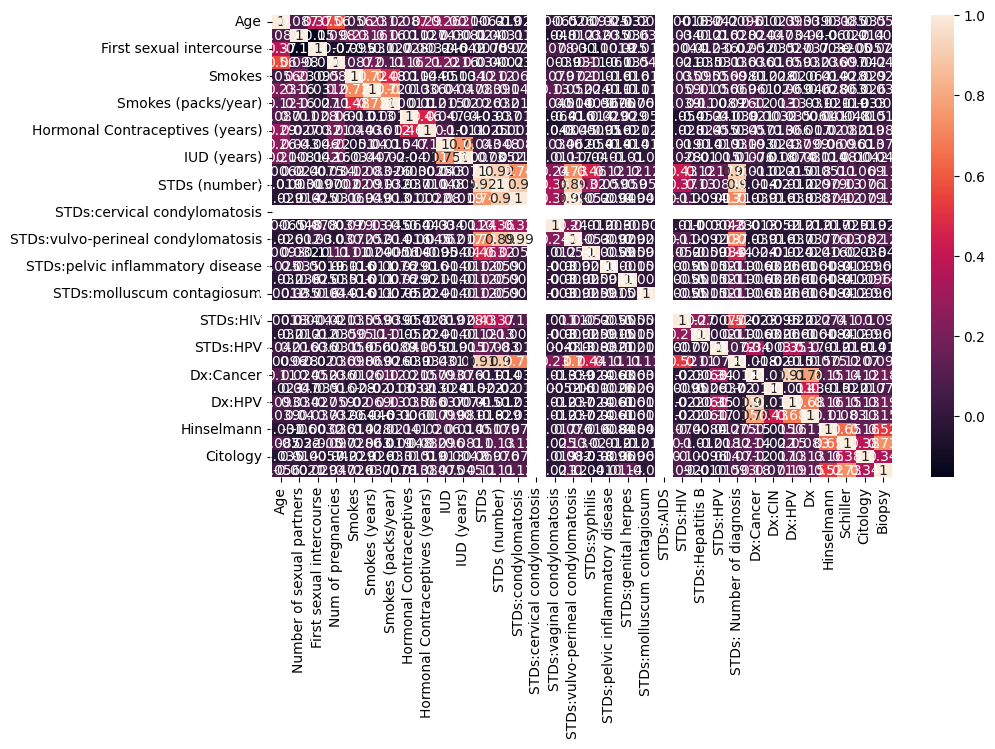

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Матрица корреляции
correlation_matrix = df.corr()
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(correlation_matrix, annot = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    int64  
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n